In [1]:
import collections
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src import const
from src.io import get_corpus
from src.processing import process_string_to_tokens, process_strings_to_token_lists

##### Overview the formatting

In [2]:
count = 3
with const.PATHS.CORPUS_NEG.open() as dataset:
    head = [next(dataset) for x in range(count)]
print(*head, sep='\n')

simplistic , silly and tedious . 

it's so laddish and juvenile , only teenage boys could possibly find it funny . 

exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . 



##### Load the dataset to memory

In [3]:
corpus = get_corpus()

##### Show dataset size

In [4]:
print(*[f"{label_name} label: {len(corpus_)} snippets" 
       for label_name, corpus_ in 
       (("Positive", corpus.pos), 
        ("Negative", corpus.neg))], sep='\n')

Positive label: 5331 snippets
Negative label: 5331 snippets


##### Transform and clean data

In [5]:
# Processed example
process_string_to_tokens('I think this movie is great !')

['think', 'movi', 'great']

In [6]:
TokensList = collections.namedtuple('Tokens', 'neg pos all')
tokens_list = TokensList(neg=process_strings_to_token_lists(corpus.neg),
                         pos=process_strings_to_token_lists(corpus.pos),
                         all=process_strings_to_token_lists(corpus.neg + corpus.pos))

In [7]:
# Show result
print(*tokens_list.neg[0:3], sep='\n')

['simplist', 'silli', 'tediou']
['laddish', 'juvenil', 'teenag', 'boy', 'could', 'possibl', 'find', 'funni']
['exploit', 'larg', 'devoid', 'depth', 'sophist', 'would', 'make', 'watch', 'graphic', 'treatment', 'crime', 'bearabl']


##### Get token frequencies

In [8]:
def flatten_2d_array(matrix):
    return [element for vector in matrix for element in vector]

Freq = collections.namedtuple('Frequencies', 'neg pos all')
freq = Freq(neg=Counter(flatten_2d_array(tokens_list.neg)),
                          pos=Counter(flatten_2d_array(tokens_list.pos)),
                          all=Counter(flatten_2d_array(tokens_list.neg + tokens_list.pos)))

##### Show histogram of token frequencies

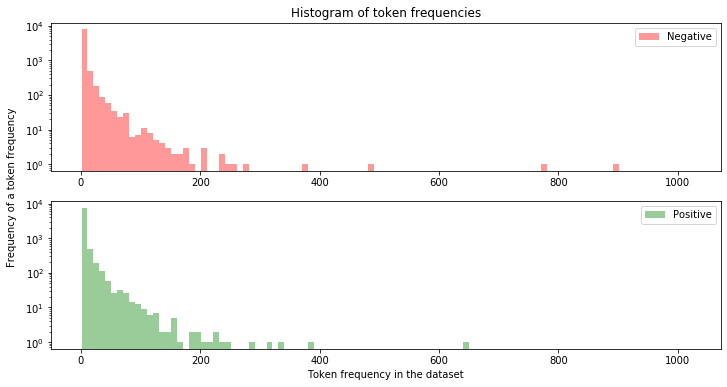

In [9]:
# Text
title = "Histogram of token frequencies"
xlabel = "Token frequency in the dataset"
ylabel = "Frequency of a token frequency"

# Values
max_bin_value = max(f.most_common(1)[0][1] for f in (freq.neg, freq.pos))
bin_size = 10
values_neg = [int(v) for v in freq.neg.values()]
values_pos = [int(v) for v in freq.pos.values()]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=const.JUPYTER.FIGURE_SIZE, sharey='all')
ax[0].set(yscale='log', xlabel='', ylabel='')
ax[1].set(yscale='log', xlabel=xlabel, ylabel='')
fig.text(0.08, 0.5, ylabel, ha="center", va="center", rotation=90)
bins = range(1, max_bin_value, bin_size)
sns.distplot(values_neg, bins=bins, kde=False, color="red",
             label="Negative", ax=ax[0]).set_title(title)
sns.distplot(values_pos, bins=bins, kde=False, color="green",
             label="Positive", ax=ax[1])
for ax_ in ax:
    ax_.legend()

##### Show most frequent words

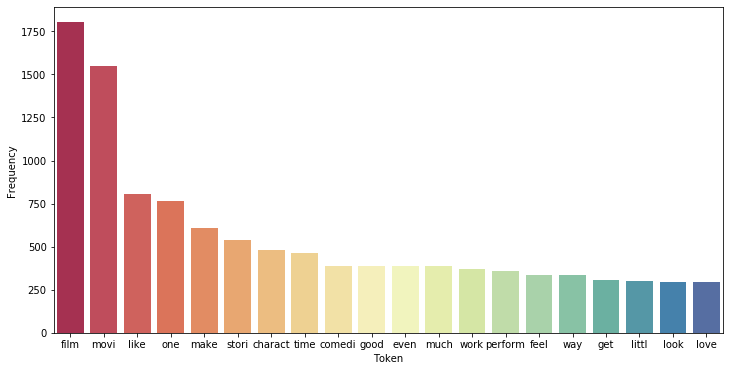

In [10]:
xlabel, ylabel = "Token", "Frequency"
df = pd.DataFrame(freq.all.most_common(20), columns = [xlabel, ylabel])
fig, ax = plt.subplots(figsize=const.JUPYTER.FIGURE_SIZE)
sns.barplot(data=df, ax=ax, x=xlabel, y=ylabel, palette='Spectral')
pass